# Mini Project - Mini Project - Predict Customer Clicked Ads Classification by Using Machine Learning

A company in Indonesia wants to know the effectiveness of an advertisement that they run, this is important for the company because it allows them to determine how successful the advertisements are in attracting customers to see advertisements. It can help companies determine marketing targets by processing historical advertisement data and finding insights and patterns that occur. The focus of this case is to create machine learning classification models that function to determine the right target customers.

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Description

## Import files

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Descriptive Statistic

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [4]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [5]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

Observation:
1. We see that the data still contains Null Values, so we need to clean it.
2. Because the `Unnamed: 0` column is just a repetition of the index, we can remove it.
3. Some columns require encoding.
4. Some of the columns appear to be skewed.

In [6]:
df = df.drop(columns='Unnamed: 0')

## Statistical Analysis

In [7]:
nums = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
cats = ['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

In [8]:
df[nums].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


Observation:
1. The columns with symmetrical distributions are `Daily Time Spent on Site`, and `Daily Internet Usage`.
2. `Age`and `Area Income` appears to be skewed.

In [9]:
df[cats].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [10]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Male:
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count kolom Timestamp:
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

Value count kolom Clicked on Ad:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru         

Observation :
1. Women are the most common customers in Surabaya, but the province is most prevalent in DKI Jakarta. It can be ambiguous, so we must take action in this case.
2. The most `category` clicked is Otomotif, and the distribution of `clicked on ads` is normally distributed

## Univariate Analysis

### Box Plot

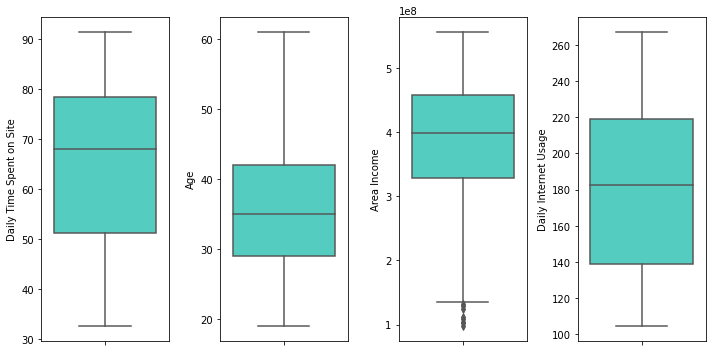

In [11]:
features = nums
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='turquoise', orient='v')
    plt.tight_layout()

Observation:
- `Area Income` column looks more skewed to right. The `Age` column looks skewed to left
- `Area Income` has outlier data

### Distribution Plot

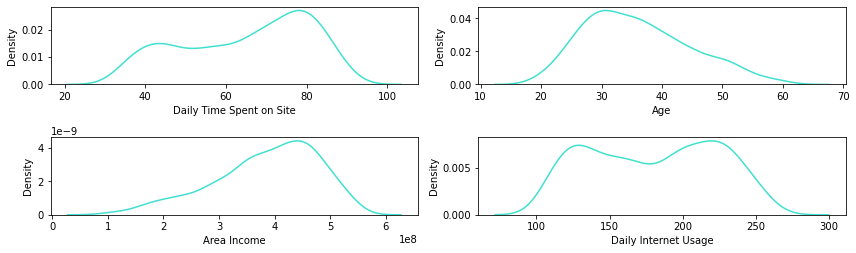

In [12]:
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3,2, i+1)
    sns.kdeplot(x=df[features[i]], color='turquoise')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
- `Daily Time Spent on Site` and `Daily Internet Usage` feature looks bimodal

### Bar Plot for Categorical

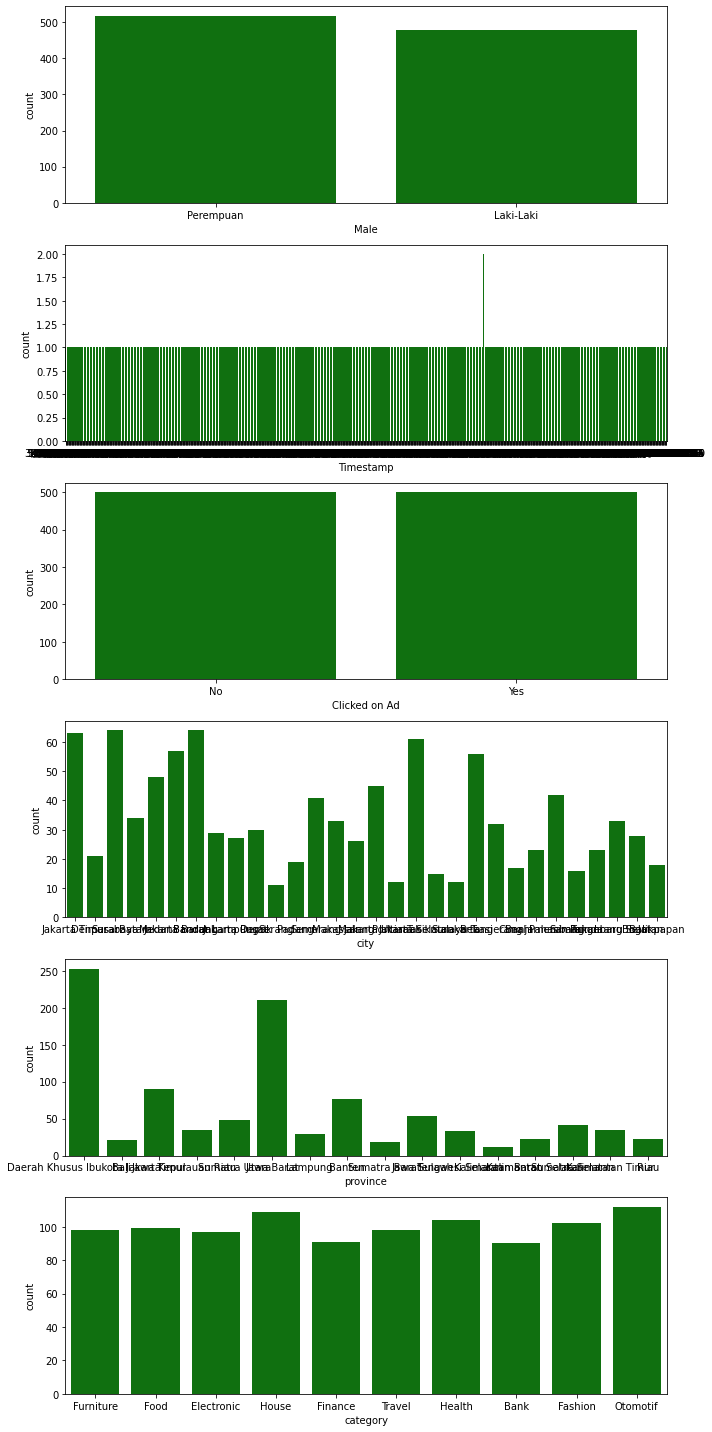

In [13]:
plt.figure(figsize=(10, 20))

for i in range(0, len(cats)):
    plt.subplot(6, 1, i+1)
    sns.countplot(x = df[cats[i]], color='green', orient='v')
    plt.tight_layout()

Observation :
1. Women are the most common customers in Surabaya, but the province is most prevalent in DKI Jakarta. It can be ambiguous, so we must take action in this case.
2. The most `category` clicked is Otomotif, and the distribution of `clicked on ads` is normally distributed

### Stacked Bar Plot Numerical Feature to Clicked on Ad

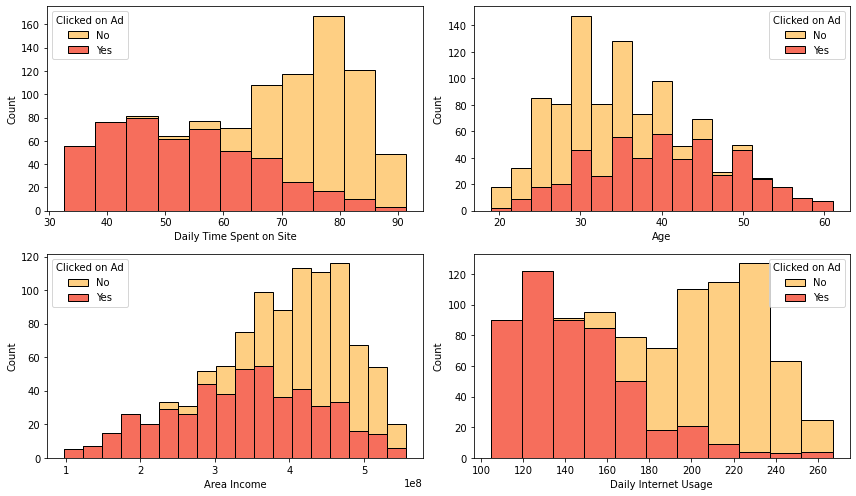

In [14]:
features = nums
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(3,2, i+1)
    sns.histplot(x=df[features[i]], hue='Clicked on Ad', data=df, color='indianred', palette="YlOrRd", multiple='stack')
    plt.xlabel(features[i])
    plt.tight_layout()

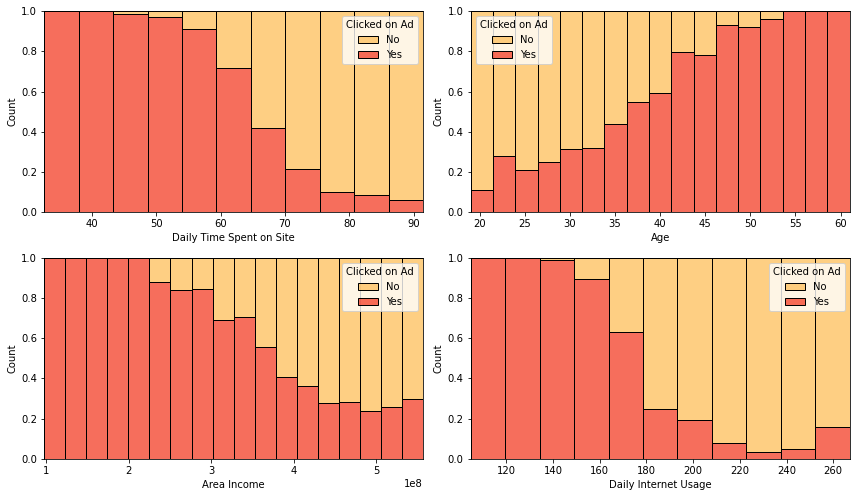

In [15]:
features = nums
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(3,2, i+1)
    sns.histplot(x=df[features[i]], hue='Clicked on Ad', data=df, color='indianred', palette="YlOrRd", multiple='fill')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. Based on the characteristics listed above, it is clear that customers are divided into several groups
2. It is divided into three sections based on the 'Age' feature, namely:
    - Click ads less than 50% = Age 35 and under
    - Click ads less than 50% = Age 35 and under
    - Click ads at 80% or higher = Age 45 and up
3. The distribution of the 'Daily Time Spent on Site' and 'Daily Internet Usage' features is closely similar.

## Multivariate Analysis

### Correlation Heatmap

In [16]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.000000,-0.331424,0.308266,0.518294
Age,-0.331424,1.000000,-0.179343,-0.370481
Area Income,0.308266,-0.179343,1.000000,0.338080
Daily Internet Usage,0.518294,-0.370481,0.338080,1.000000


We want to see `Clicked on Ad` feature correlation, so we can encoding it first

In [17]:
df['Clicked on Ad'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [18]:
df_corr = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']]

<AxesSubplot:>

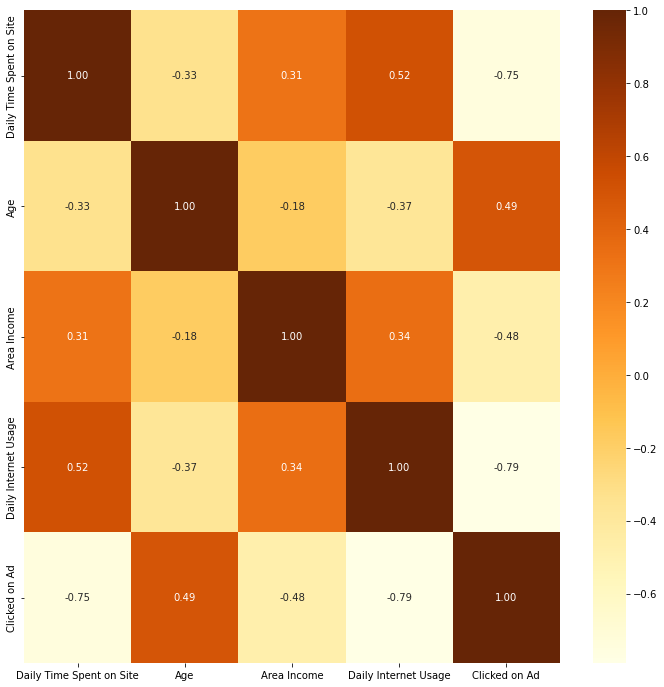

In [19]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr.corr(), cmap='YlOrBr', annot=True, fmt='.2f')

Observation:
1. We can see that `Age` and `Clicked on Ad` Features have positively correlation
2. `Daily Internet Usage` and `Daily Time Spent on Site` Features have positively Correlation

## Data Cleaning

### Checking Null Values

In [20]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

Methods for dealing with missing data values include:
1. `Daily Time Spent on Site` : Filling null values with median
2. `Area Income` : Filling null values with median
3. `Daily Internet Usage` : Filling null values with median
4. `Male` : Filling null values with mode

In [21]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].median(), inplace=True)
df['Area Income'].fillna(df['Area Income'].median(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].median(), inplace=True)
df['Male'].fillna(df['Male'].mode()[0], inplace=True)

In [22]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

### Checking Duplicated Values

In [23]:
df.duplicated().sum()

0

There are no duplicates in the data.

### Extract datatime

In [24]:
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   int64  
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
 10  Time                      1000 non-null   object 
 11  Date                      1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


### Feature Encoding

We need to encoding categorical feature for better insight. Feature that we need to encoding is:
1. `Male` : Label Encoding
2. `Clicked on Ad` : Label Encoding
3. `city` : One Hot Encoding
4. `province` : One Hot Encoding
5. `category` : One Hot Encoding

In [26]:
df['Male'].replace(['Perempuan', 'Laki-Laki'], [0, 1], inplace=True)

In [27]:
for i in ['city', 'province', 'category']:
    onehots = pd.get_dummies(df[i], prefix=i)
    df = df.join(onehots)

In [28]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [29]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Time,Date,city_Balikpapan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,city_Jakarta Barat,city_Jakarta Pusat,city_Jakarta Selatan,city_Jakarta Timur,city_Jakarta Utara,city_Makassar,city_Malang,city_Medan,city_Padang,city_Pakanbaru,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,3/27/2016 0:53,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,00:53:00,2016-03-27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,4/4/2016 1:39,0,Denpasar,Bali,Food,01:39:00,2016-04-04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,3/13/2016 20:35,0,Surabaya,Jawa Timur,Electronic,20:35:00,2016-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,1/10/2016 2:31,0,Batam,Kepulauan Riau,House,02:31:00,2016-01-10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,6/3/2016 3:36,0,Medan,Sumatra Utara,Finance,03:36:00,2016-06-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


### Normalization / Standardization

In [30]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city_Balikpapan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,city_Jakarta Barat,city_Jakarta Pusat,city_Jakarta Selatan,city_Jakarta Timur,city_Jakarta Utara,city_Makassar,city_Malang,city_Medan,city_Padang,city_Pakanbaru,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,64.970870,36.009000,3.850493e+08,179.894270,0.479000,0.50000,0.018000,0.02900,0.064000,0.023000,0.03400,0.056000,0.028000,0.017000,0.021000,0.030000,0.057000,0.027000,0.06100,0.063000,0.045000,0.033000,0.026000,0.048000,0.019000,0.023000,0.04200,0.01200,0.016000,0.041000,0.011000,0.064000,0.01200,0.032000,0.033000,0.015000,0.021000,0.076000,0.253000,0.210000,0.053000,0.090000,0.01200,0.023000,0.03400,0.03400,0.02900,0.023000,0.033000,0.019000,0.04200,0.048000,0.090000,0.097000,0.1020,0.091000,0.099000,0.098000,0.104000,0.109000,0.112000,0.098000
std,15.745394,8.785562,9.347971e+07,43.628915,0.499809,0.50025,0.133018,0.16789,0.244875,0.149978,0.18132,0.230037,0.165055,0.129336,0.143456,0.170673,0.231959,0.162164,0.23945,0.243085,0.207408,0.178726,0.159215,0.213873,0.136593,0.149978,0.20069,0.10894,0.125538,0.198389,0.104355,0.244875,0.10894,0.176088,0.178726,0.121613,0.143456,0.265131,0.434948,0.407512,0.224146,0.286325,0.10894,0.149978,0.18132,0.18132,0.16789,0.149978,0.178726,0.136593,0.20069,0.213873,0.286325,0.296106,0.3028,0.287753,0.298811,0.297463,0.305413,0.311795,0.315524,0.297463
min,32.600000,19.000000,9.797550e+07,104.780000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.545000,29.000000,3.298201e+08,139.017500,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

In [32]:
# rescale `Daily Time Spent on Site` and `Daily Internet Usage`
df['Daily Time Spent on Site_norm'] = MinMaxScaler().fit_transform(df['Daily Time Spent on Site'].values.reshape(len(df),1))
df['Daily Internet Usage_norm'] = MinMaxScaler().fit_transform(df['Daily Time Spent on Site'].values.reshape(len(df), 1))                                     

In [33]:
# standard
df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df),1))
df['Area Income_std'] = StandardScaler().fit_transform(df['Area Income'].values.reshape(len(df),1))

In [34]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city_Balikpapan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,city_Jakarta Barat,city_Jakarta Pusat,city_Jakarta Selatan,city_Jakarta Timur,city_Jakarta Utara,city_Makassar,city_Malang,city_Medan,city_Padang,city_Pakanbaru,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Daily Time Spent on Site_norm,Daily Internet Usage_norm,Age_std,Area Income_std
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,64.970870,36.009000,3.850493e+08,179.894270,0.479000,0.50000,0.018000,0.02900,0.064000,0.023000,0.03400,0.056000,0.028000,0.017000,0.021000,0.030000,0.057000,0.027000,0.06100,0.063000,0.045000,0.033000,0.026000,0.048000,0.019000,0.023000,0.04200,0.01200,0.016000,0.041000,0.011000,0.064000,0.01200,0.032000,0.033000,0.015000,0.021000,0.076000,0.253000,0.210000,0.053000,0.090000,0.01200,0.023000,0.03400,0.03400,0.02900,0.023000,0.033000,0.019000,0.04200,0.048000,0.090000,0.097000,0.1020,0.091000,0.099000,0.098000,0.104000,0.109000,0.112000,0.098000,0.550244,0.550244,-2.486900e-17,2.071676e-16
std,15.745394,8.785562,9.347971e+07,43.628915,0.499809,0.50025,0.133018,0.16789,0.244875,0.149978,0.18132,0.230037,0.165055,0.129336,0.143456,0.170673,0.231959,0.162164,0.23945,0.243085,0.207408,0.178726,0.159215,0.213873,0.136593,0.149978,0.20069,0.10894,0.125538,0.198389,0.104355,0.244875,0.10894,0.176088,0.178726,0.121613,0.143456,0.265131,0.434948,0.407512,0.224146,0.286325,0.10894,0.149978,0.18132,0.18132,0.16789,0.149978,0.178726,0.136593,0.20069,0.213873,0.286325,0.296106,0.3028,0.287753,0.298811,0.297463,0.305413,0.311795,0.315524,0.297463,0.267642,0.267642,1.000500e+00,1.000500e+00
min,32.600000,19.000000,9.797550e+07,104.780000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.936986e+00,-3.072511e+00
25%,51.545000,29.000000,3.298201e+08,139.017500,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0

## Modelling

### Prep for Modelling

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [36]:
# Split data into features(X) and target(y)
X = df[['Age','Area Income','Daily Time Spent on Site','Daily Internet Usage']]
y = df['Clicked on Ad']

# Split data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
print("Feature Variables: ")
print(X.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int64  
 1   Area Income               1000 non-null   float64
 2   Daily Time Spent on Site  1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None


### Decision Tree (Default)

In [38]:
#import sklearn DT and create decision tree function
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt_model = DecisionTreeClassifier()

#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_classification2(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print('Test score:' + str(model.score(X_test, y_test))) #Test score
    print('Train score: ' + str(model.score(X_train, y_train))) #Train score


    conf_mat = confusion_matrix(y_test,y_pred)
    print(conf_mat)
    print('='*100)
    print()

In [41]:
eval_classification2(dt_model)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 1.00
Test score:0.9366666666666666
Train score: 1.0
[[136  10]
 [  9 145]]



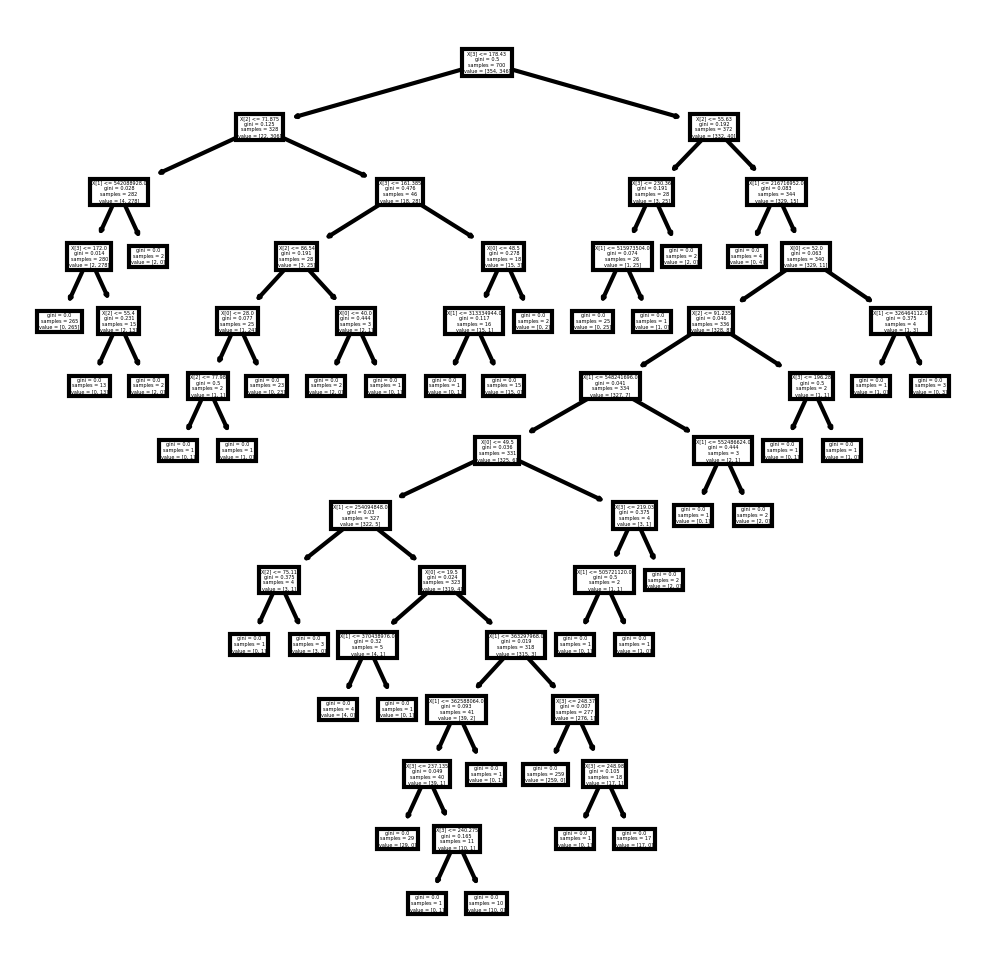

In [42]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt_model);

### Decision Tree (After Normalization & Standardization)

In [51]:
X1 = df[['Age_std','Area Income_std','Daily Time Spent on Site_norm','Daily Internet Usage_norm']]
y1 = df['Clicked on Ad']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [52]:
print("Feature Variables: ")
print(X1.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age_std                        1000 non-null   float64
 1   Area Income_std                1000 non-null   float64
 2   Daily Time Spent on Site_norm  1000 non-null   float64
 3   Daily Internet Usage_norm      1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB
None


In [53]:
dt_model2 = DecisionTreeClassifier()

#fitting the model
dt_model2.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_classification3(model):
    y_pred = model.predict(X1_test)
    y_pred_train = model.predict(X1_train)
    y_pred_proba = model.predict_proba(X1_test)
    y_pred_proba_train = model.predict_proba(X1_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y1_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y1_train, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y1_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y1_train, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y1_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y1_train, y_pred_train))

    print("F1-Score (Test Set): %.2f" % f1_score(y1_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y1_train, y_pred_train))

    print('Test score:' + str(model.score(X1_test, y1_test))) #Test score
    print('Train score: ' + str(model.score(X1_train, y1_train))) #Train score


    conf_mat = confusion_matrix(y1_test,y_pred)
    print(conf_mat)
    print('='*100)
    print()

In [55]:
eval_classification3(dt_model2)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 1.00
Precision (Test Set): 0.88
Precision (Train Set): 1.00
Recall (Test Set): 0.87
Recall (Train Set): 1.00
F1-Score (Test Set): 0.87
F1-Score (Train Set): 1.00
Test score:0.87
Train score: 1.0
[[127  19]
 [ 20 134]]



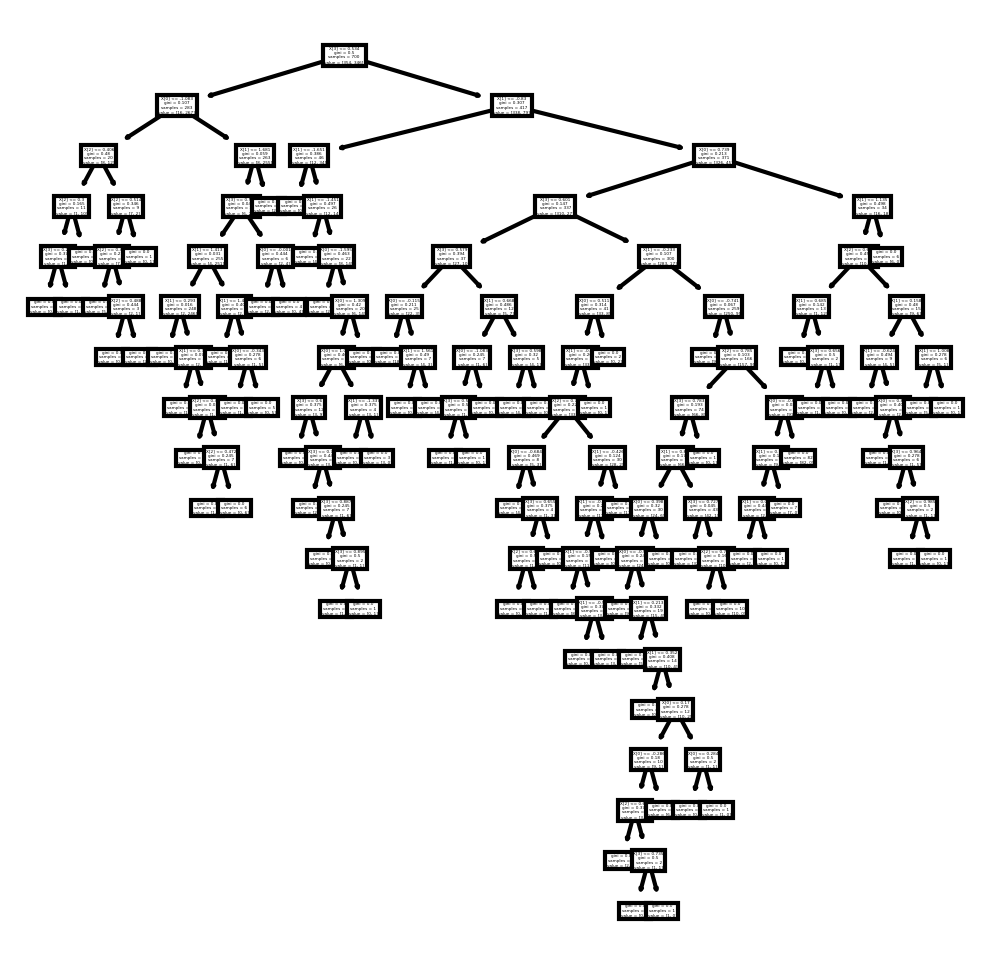

In [56]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt_model2);

### Hyperparameter Tuning (Default)

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [3] # Maximum number of levels in tree
min_samples_split = [int(i) for i in range(100)] # Minimum number of samples required to split a node
min_samples_leaf = [int(i) for i in range(50)] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
modelt = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='accuracy')
modelt.fit(X_train, y_train)

# Predict & Evaluation
y_pred = modelt.predict(X_test)#Check performa dari model
eval_classification2(modelt)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.94
Precision (Test Set): 0.89
Precision (Train Set): 0.91
Recall (Test Set): 0.97
Recall (Train Set): 0.97
F1-Score (Test Set): 0.93
F1-Score (Train Set): 0.94
Test score:0.9266666666666666
Train score: 0.9414285714285714
[[128  18]
 [  4 150]]



In [58]:
print('Best max_depth:', modelt.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', modelt.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', modelt.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', modelt.best_estimator_.get_params()['max_features'])

Best max_depth: 3
Best min_samples_split: 60
Best min_samples_leaf: 8
Best max_features: auto


In [59]:
models = DecisionTreeClassifier(max_depth = 3, min_samples_split = 60, min_samples_leaf = 8, max_features = 'auto', random_state=42)
models.fit(X_train,y_train)

y_pred = models.predict(X_test)
eval_classification2(models)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.94
Precision (Test Set): 0.89
Precision (Train Set): 0.91
Recall (Test Set): 0.97
Recall (Train Set): 0.97
F1-Score (Test Set): 0.93
F1-Score (Train Set): 0.94
Test score:0.9266666666666666
Train score: 0.9414285714285714
[[128  18]
 [  4 150]]



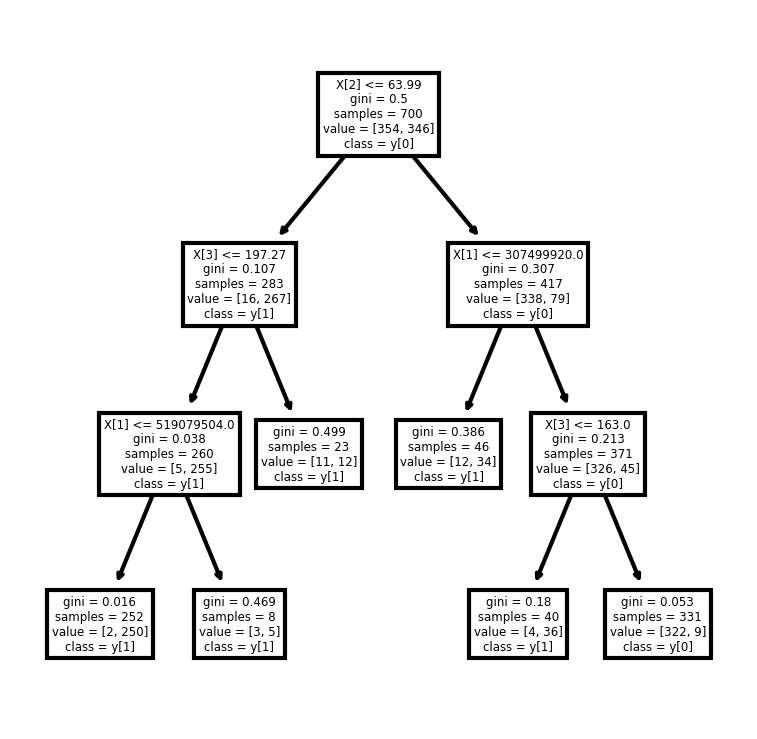

In [60]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)

tree.plot_tree(models, class_names=True)
plt.savefig('Tree1.png', dpi=300);

In [61]:
def show_feature_importance(models):
    feat_importances = pd.Series(models.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

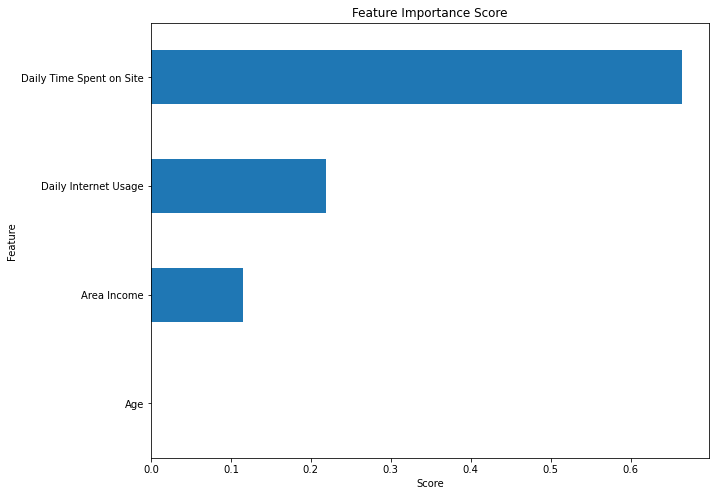

In [64]:
show_feature_importance(models)
plt.savefig('FI.png', dpi=600)

Observation :
- From the plot above, we see that `Daily Time Spent on Site` is the most feature importance in this dataset